In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from ukf import UKFResults

In [98]:
files = {
    "one_res/BlueRov2Heavy_Xu": (-16., -13.7, 10),
    "one_res/BlueRov2Heavy_Yv": (-10., -6.0, 11),
    "one_res/BlueRov2Heavy_Zw": (-39., -33.0, 12),
    "one_res/BlueRov2Heavy_Kp": (-1.5, -0.9, 13),
    "one_res/BlueRov2Heavy_Mq": (-1.5, -0.8, 14),
    "one_res/BlueRov2Heavy_Nr": (-1., 0, 15),
    "one_res/BlueRov2Heavy_Xdu": (-10., -6.36, 16),
    "one_res/BlueRov2Heavy_Ydv": (-10., -6.0, 17),
    "one_res/BlueRov2Heavy_Zdw": (-25., -18.68, 18),
    "one_res/BlueRov2Heavy_Kdp": (-0.3, -0.189, 19),
    "one_res/BlueRov2Heavy_Mdq": (-0.3, -0.135, 20),
    "one_res/BlueRov2Heavy_Ndr": (-0.3, -0.222, 21),

}


In [81]:

def load_data(file):
    data = {}
    with h5py.File(file, "r") as f:
        for key in f.keys():
            data[key] = np.array(f[key])

    return data


f = "BlueRov2Heavy_Zw"
def get_y_label_from_filename(filename):
    label = filename.split("_")[-1]
    if "d" in label:
        label = label.replace("d", "_\\dot{") + "}"
    else:
        label = label[0] + "_" + label[1]
    return "$\\mathbf{" + label + "}$"
a = get_y_label_from_filename(f)
a

'$\\mathbf{Z_w}$'

In [ ]:
def plot_hydro_param(x_bar, x, t_vec, label="", filename=""):
    gt = np.zeros((len(t_vec)))
    for i, t in enumerate(t_vec):
        if t < 40:
            gt[i] = x[1]
        else:
            gt[i] = x[0]
    
    fig, axes = plt.subplots(2, 1, sharex=False)

    axes = axes.flatten()
    axes[0].plot(t_vec, gt, linestyle="--", label="True value")
    axes[0].plot(t_vec, x_bar, label="Estimated")
    axes[0].legend()
    axes[0].grid(True)
    axes[0].set_ylabel(label, rotation=0)
    axes[1].grid(True)
    axes[1].plot(t_vec , x_bar - gt, label="Error")
    axes[1].set_ylabel(label, rotation=0)
    axes[1].set_xlabel("Time [s]")
    axes[1].legend()
    if filename:
        if ".pdf" not in filename:
            filename += ".pdf"
        plt.savefig(f"one_res/plot/{filename}", format="pdf")


# key = next(iter(files))
# print(key)
# val = files[key]
# data = load_data(key)
# x_bar = data["x_bar"][:, val[-1]]
# plot_hydro_param(x_bar, val[:2], data["t"])


for key, val in files.items():
    data = load_data(key)
    x_bar = data["x_bar"][:, val[-1]]
    label = get_y_label_from_filename(key)
    filename = key.split("/")[-1]
    plot_hydro_param(x_bar, val[:2], data["t"], label=label, filename=filename)



        
plt.show()
    

dict_keys(['t', 'u', 'x'])


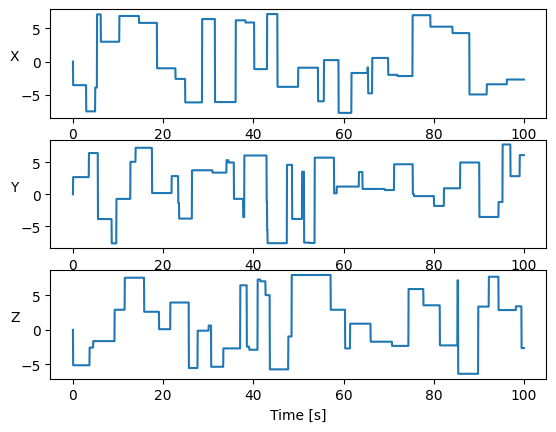

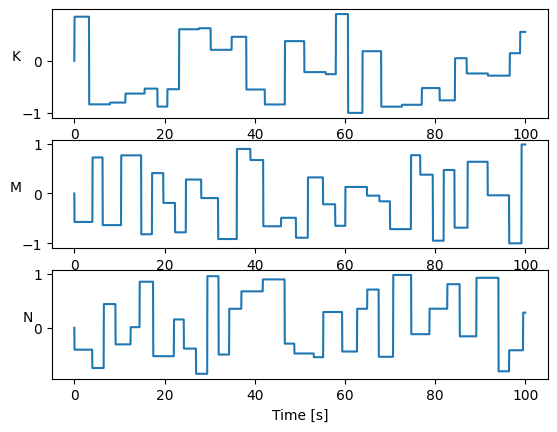

In [122]:
data = load_data("one_res/BlueRov2Heavy__TheInput")
print(data.keys())

def plot_input(t, u, labels, title=""):
    fig, axes = plt.subplots(3, 1, sharex=False)
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        axes[i].plot(t, u[:, i])
        axes[i].set_ylabel(labels[i], rotation=0)
    axes[-1].set_xlabel("Time [s]")
    plt.savefig(title, format="pdf")
    plt.show()
labels = ("X", "Y", "Z")
plot_input(data["t"], data["u"][:, :3], labels, "one_res/plot/input_XYZ.pdf")
labels = ("K", "M", "N")
plot_input(data["t"], data["u"][:, 3:], labels, "one_res/plot/input_KMN.pdf")